In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

glass = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\KNN\\glass.csv",header=0)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [100]:
# Normalizing the numerical data
glassfeatures_normalized = pd.DataFrame(data = scale(glass.iloc[:,0:9]), columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])
glassfeatures_normalized['Type']=glass['Type']
glassfeatures_normalized.drop(['Ca'],axis=1,inplace=True)
glassfeatures_normalized

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,2.812087,-0.586451,7


In [101]:
# Training and Test data using 

df_train,df_test = train_test_split(glassfeatures_normalized,test_size = 0.15,random_state=8)

# KNN using sklearn 
# for 3 nearest neighbours 
knc = KNeighborsClassifier(n_neighbors= 3)

# Fitting with training data 
knc.fit(df_train.iloc[:,0:8],df_train.iloc[:,8])

# train accuracy 
accuracy_train = np.mean(knc.predict(df_train.iloc[:,0:8])==df_train.iloc[:,8])  #81%
# test accuracy
accuracy_test = np.mean(knc.predict(df_test.iloc[:,0:8])==df_test.iloc[:,8])  #63%

In [102]:
accuracy_list = []
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(df_train.iloc[:,0:8],df_train.iloc[:,8])
    accuracy_train = np.mean(knc.predict(df_train.iloc[:,0:8])==df_train.iloc[:,8])
    accuracy_test = np.mean(knc.predict(df_test.iloc[:,0:8])==df_test.iloc[:,8])
    accuracy_list.append([accuracy_train,accuracy_test])
accuracy_list

[[0.8176795580110497, 0.6363636363636364],
 [0.7734806629834254, 0.6666666666666666],
 [0.7348066298342542, 0.5454545454545454],
 [0.7182320441988951, 0.5151515151515151],
 [0.6961325966850829, 0.5757575757575758],
 [0.6906077348066298, 0.5454545454545454],
 [0.6906077348066298, 0.5757575757575758],
 [0.6961325966850829, 0.5454545454545454],
 [0.6574585635359116, 0.5454545454545454],
 [0.6464088397790055, 0.6060606060606061],
 [0.6408839779005525, 0.45454545454545453],
 [0.6132596685082873, 0.48484848484848486],
 [0.6298342541436464, 0.3939393939393939],
 [0.6353591160220995, 0.48484848484848486],
 [0.6353591160220995, 0.5151515151515151],
 [0.6298342541436464, 0.48484848484848486],
 [0.6243093922651933, 0.45454545454545453],
 [0.6187845303867403, 0.3939393939393939],
 [0.6022099447513812, 0.3939393939393939],
 [0.5911602209944752, 0.45454545454545453],
 [0.6132596685082873, 0.45454545454545453],
 [0.6022099447513812, 0.45454545454545453],
 [0.569060773480663, 0.45454545454545453],
 [0

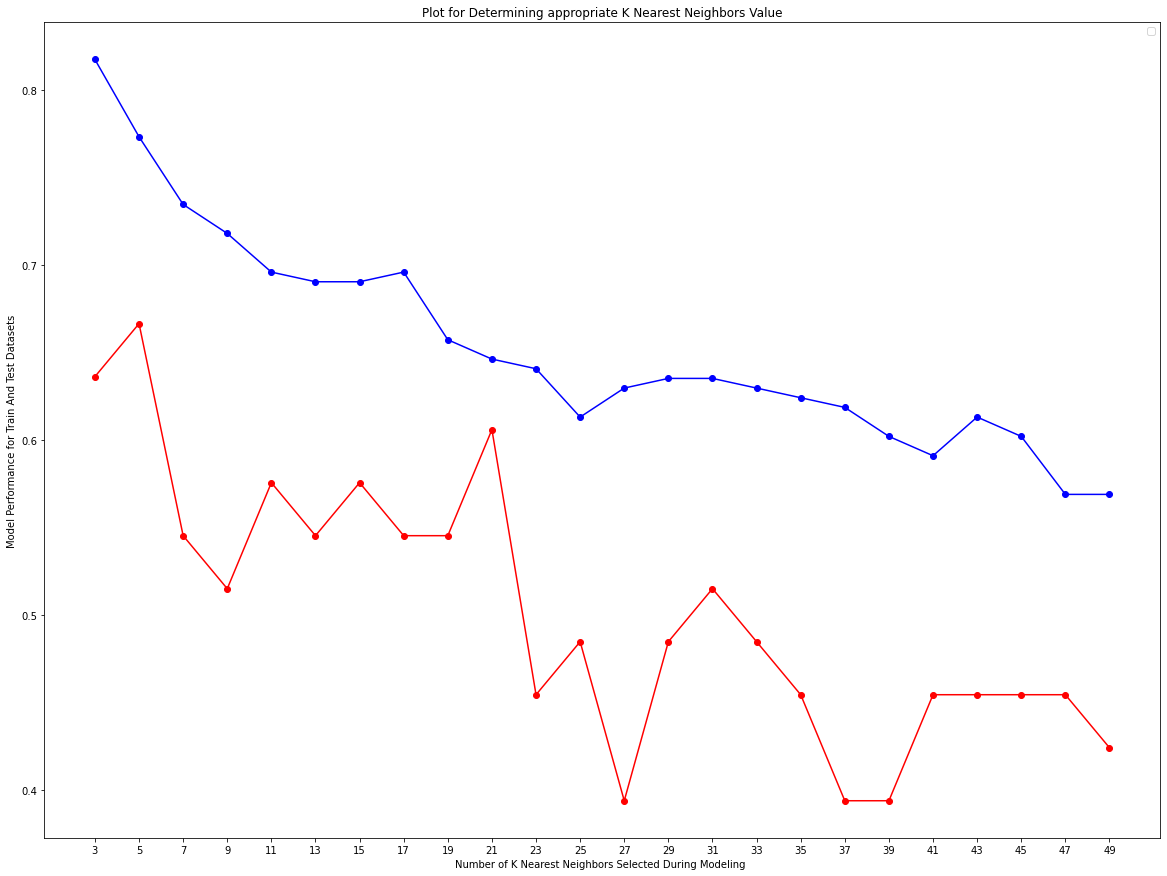

In [103]:
plt.figure(figsize=(20,15))
plt.legend(["Training_Set","Testing_Set"])
plt.xlabel("Number of K Nearest Neighbors Selected During Modeling ")
plt.ylabel("Model Performance for Train And Test Datasets")
plt.xticks(np.arange(3,50,2))
plt.title('Plot for Determining appropriate K Nearest Neighbors Value')

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy_list],"bo-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy_list],"ro-")

In [104]:
#Prepare the Model by selecting appropriate K Nearest Neighbors value from the above graph
knc = KNeighborsClassifier(n_neighbors= 21)

# Fitting with training data 
knc.fit(df_train.iloc[:,0:8],df_train.iloc[:,8])

# train accuracy 
accuracy_train = np.mean(knc.predict(df_train.iloc[:,0:8])==df_train.iloc[:,8])
# test accuracy
accuracy_test = np.mean(knc.predict(df_test.iloc[:,0:8])==df_test.iloc[:,8])
print("Training Dataset Accuracy for KNN model in %:",accuracy_train*100)
print("Testing Dataset Accuracy for KNN model in %:",accuracy_test*100)

Training Dataset Accuracy for KNN model in %: 64.64088397790056
Testing Dataset Accuracy for KNN model in %: 60.60606060606061
